In [2]:
from matplotlib.pyplot import xlabel

from Day11_Decision_Tree_Regression import X_test, y_train, y_test
!conda install seaborn


^C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


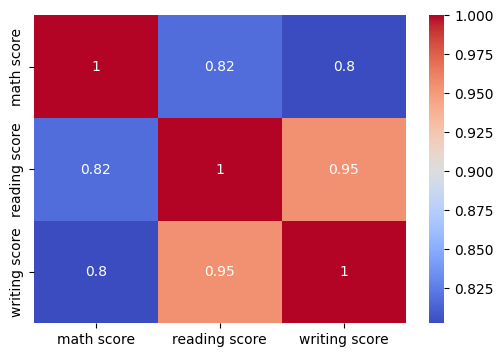

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

path = r'C:\Users\WINDOWS 10\PycharmProjects\JupyterProject\data\data jupyter\students_performance.csv'
df=pd.read_csv(path)
df.head()
df.shape
df.info()
df.isnull().sum()

X = df[["math score","reading score"]]
y = df["writing score"]

plt.figure(figsize = (6,4))
sns.heatmap(df[["math score","reading score","writing score"]].corr(), annot=True, cmap='coolwarm')
plt.show()





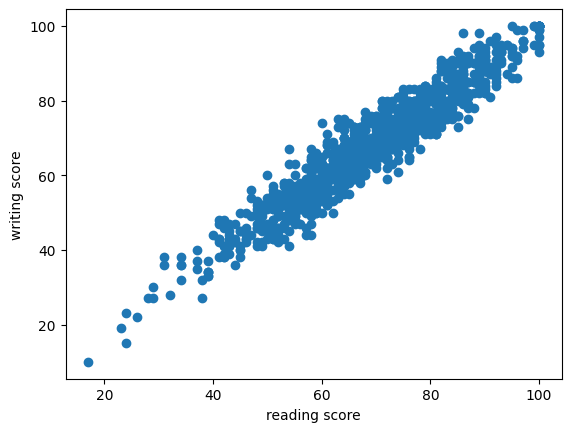

In [6]:
plt.scatter(df["reading score"], df["writing score"])
plt.xlabel('reading score')
plt.ylabel('writing score')
plt.show()

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("mean absolute error :",mae)
print("r2 score:",r2)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

feature_importance


# Conclusion:
# Random Forest Regression performed well with high R2 score.
# Both math and reading scores significantly affect writing score.
# Model generalizes well on unseen data.


mean absolute error : 4.251909816017316
r2 score: 0.8799693746185763


,Feature,Importance
0,math score,0.053473
1,reading score,0.946527
